# Script 3 -  unsupervised clustering

<div style="padding: 20px; border:4px solid green; font-size: 20px; text-align: center;">
  <img src="images/Script3_unsupervised_clustering_illustration.png" alt="Data Transformation" style="max-width: 100%; height: auto;" />
</div>


*Source : MathWorks, What Is Unsupervised Learning?, MATLAB & Simulink, accessed in 2025. [https://uk.mathworks.com/discovery/unsupervised-learning.html](https://uk.mathworks.com/discovery/unsupervised-learning.html)*


<div style="padding: 30px; border:5px solid purple; font-size: 10px;">
  <span style="font-size: 15px;">
    <i>⚠️ The cell below is not mandatory to run: the required libraries are already installed in this notebook, and reinstalling them may take a long time.</i>
  </span><br/>
</div>


In [ ]:
install.packages("NbClust")

# Librairies

In [ ]:
# Load required packages
library(vegan)
library(NbClust)

# Loading data

<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Loading the data from Doubs</i> </span><br/>
</div>


In [2]:
# load data ---------------------------------------------------------------
load("Doubs.RData")  

# 0 Selection of a resemblance criteria -> ***(Dis) similarity** or **distance matrix***

- **Unsupervised clustering** is  used to **identify natural groupings** or gradients in a dataset **without any prior assumptions or labels**. </br>

- The **results** are entirely **driven** by the **internal structure** of the data and can vary depending on the **chosen similarity/distance metric** and **clustering algorithm**. </br></br>

<div align="center"> 
  <h1 style="font-size: 15pt;">
    The first step is to select an appropriate <b>resemblance criterion</b>, 
    such as a <span style="color:red">dissimilarity or distance measure</span>, 
    to capture how similar or different the objects are.
  </h1> 
</div>


## 0.1 Data processing : remove empty sites 

In [3]:
# Remove empty site 8
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]
latlong <- latlong[-8, ]

## 0.2 Compute chord distance matrix 

In [4]:
# Compute matrix of euclidian distances of the normalized datas among sites
spe.norm <- decostand(spe, "normalize") # normalize datas
spe.ch <- vegdist(spe.norm, "euc") # calculate the chord distance matrix

## 0.3 Showing chord distance matrix with dendograms

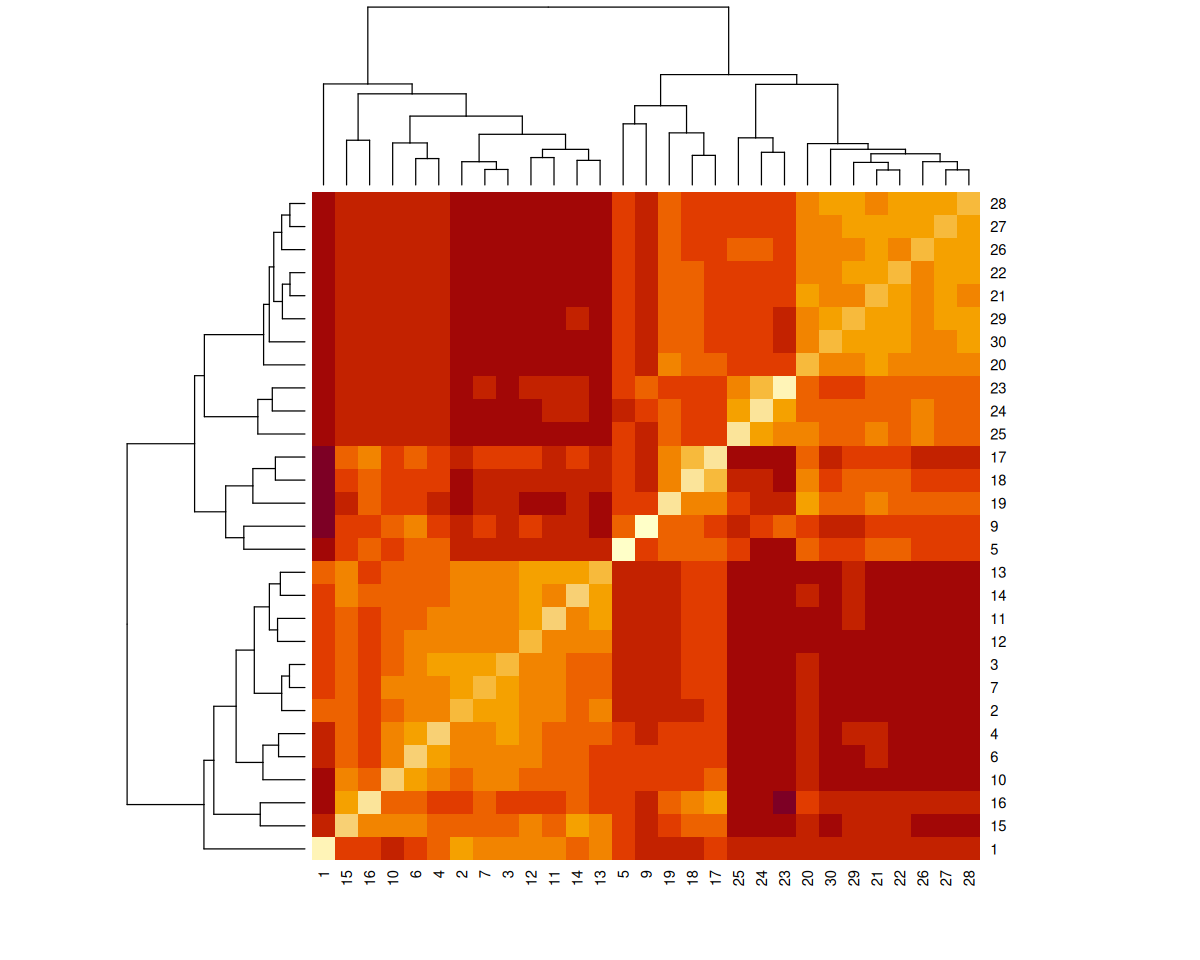

In [5]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(spe.ch))

# 1  Hierarchical agglomerative clustering 

- maintain hierarchy of similarity within group

<div style="padding: 20px; display: flex; border:4px solid green; justify-content: space-between;">
    <img src="images/Script3_unsupervised_clustering_allongee.png" width="95%">
</div>


## 1.0 Compute and plot hierarchical clustering

### 1.0.1 Hierarchical clustering computation -> ***hclust**( `df_dist`, `method`=)*

*Performs hierarchical cluster analysis on a distance matrix.* 

- **`df_dist`** → *Distance matrix*  
- **`method`** → *Agglomeration method*:  
  - `"complete"`: Complete linkage (default)  
  - `"single"`: Single linkage  
  - `"average"`: UPGMA (Unweighted Pair Group Method with Arithmetic mean)  
  - `"ward.D2"`: Ward's minimum variance method

### 1.0.2 Dendrogram Visualization → ***plot**( `hc`, `hang`, `cex`, `main`, `xlab`, `ylab`,`sub`,`horiz`)*

*Plots hierarchical clustering dendrograms with customizable formatting.*

- **hc** : *hclust object*
- **hang** : *Leaf heights*
- **cex** : *label size*
- **main** : *Title*
- **xlab** : X-axis label
- **ylab** : y-axis label
- **sub** : `Null`/`"Subtitle"` Subtitle
- **horiz** : `False`/`True` *horizontal plot*

## 1.1 Single linkage agglomerative clustering -> *hclust(`df_dist`,method ="`single`")*

<div style="padding: 10px; border:5px solid blue; font-size: 10px; text-align: center;">
    <div style="margin-top: 0px; margin-bottom: 40px; font-size: 22px; font-weight: bold;">
       <span style="color: blue;">Single Linkage</span>
    </div>
    <img src="images/Single Linkage_1.png" width="35%">
    <img src="images/Single Linkage.png" width="35%">
    <div style="margin-top: 20px; font-size: 22px; font-weight: bold;">
        Distance between clusters is defined by the <span style="color: blue;">distance</span> between their 
        <span style="color: blue;">closest</span> 
        <span style="color: blue;">members</span>.
    </div>
</div>


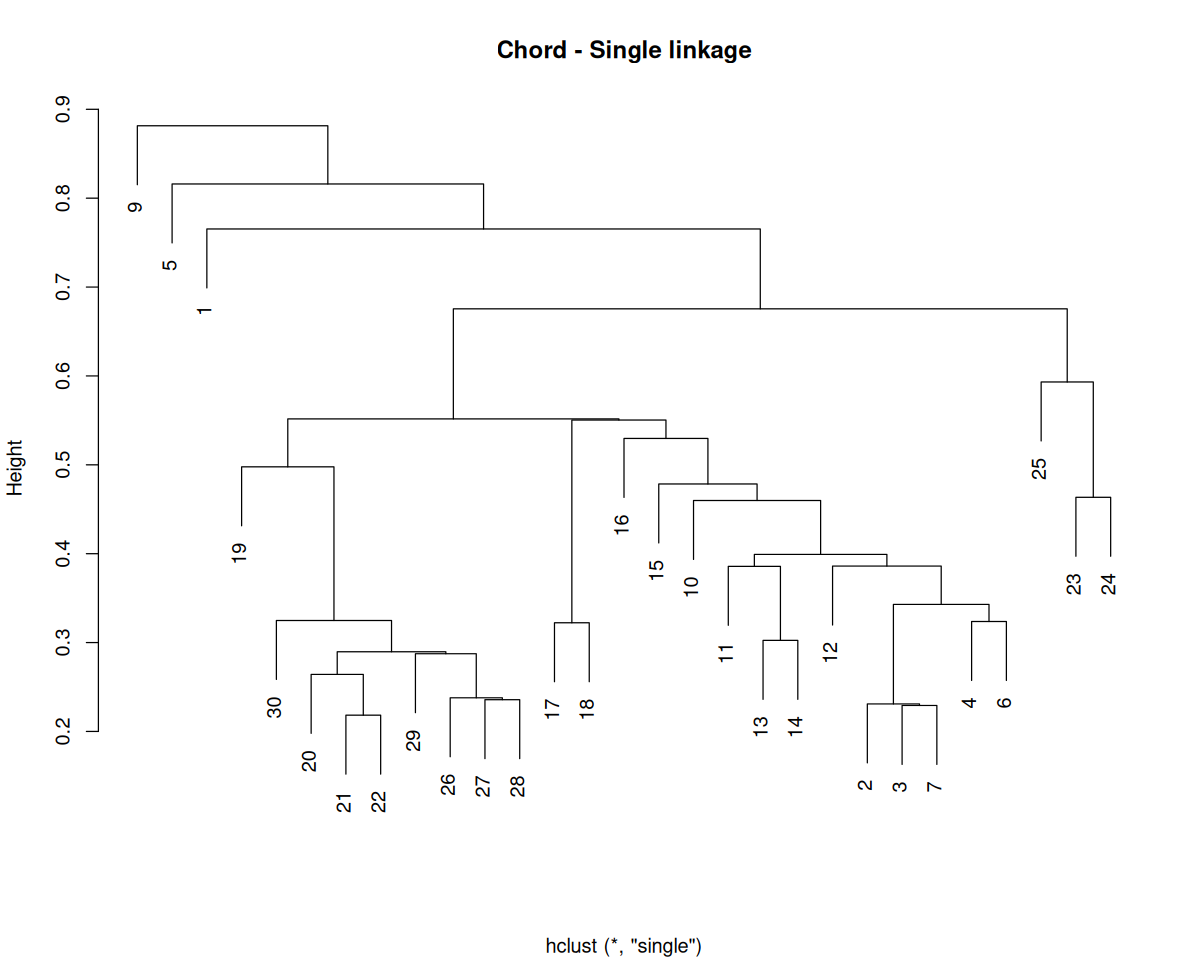

In [6]:
# Compute single linkage agglomerative clustering
spe.ch.single <- hclust(spe.ch, method = "single")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.single, main = "Chord - Single linkage", xlab="")


## 1.2 Complete-linkage agglomerative clustering -> *hclust(`df_dist`,method ="`complete`")*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <div style="margin-top: 0px; margin-bottom: 40px; font-size: 22px; font-weight: bold;">
       <span style="color: green;">Complete Linkage</span>
    </div>
    <img src="images/Complete Linkage.png" width="35%">
    <div style="margin-top: 20px; font-size: 22px; font-weight: bold;">
        Distance between clusters is defined by the <span style="color: green;">distance</span> between their 
        <span style="color: green;">furthest</span> 
        <span style="color: green;">members</span>.
    </div>
</div>


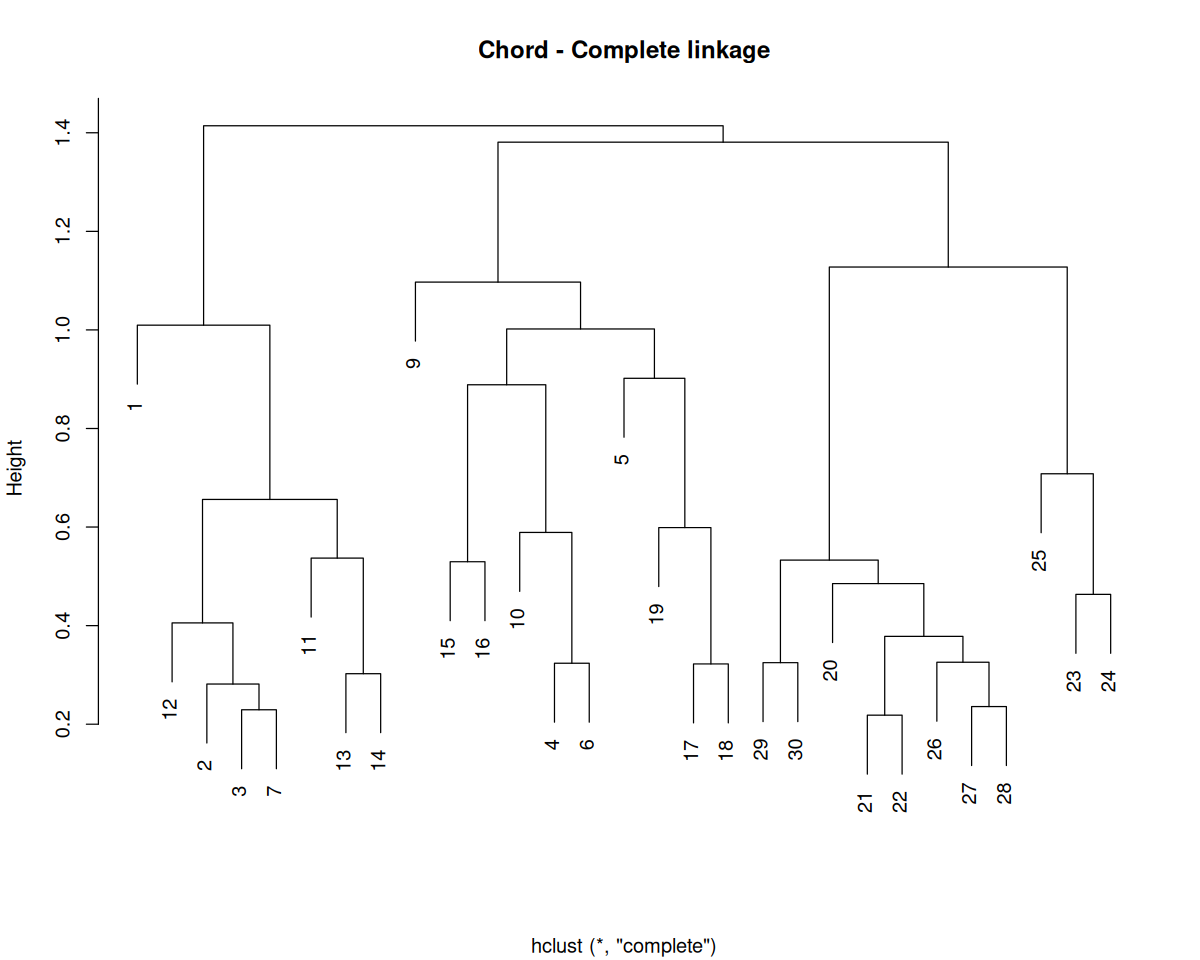

In [7]:
# Compute and plot complete-linkage agglomerative clustering
spe.ch.complete <- hclust(spe.ch, method = "complete")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.complete, main = "Chord - Complete linkage", xlab="")

## 1.3 UPGMA clustering -> *hclust(`df_dist`,method ="`average`")*

<div style="padding: 10px; border:5px solid purple; font-size: 10px; text-align: center;">
    <div style="margin-top: 0px; margin-bottom: 40px; font-size: 22px; font-weight: bold;">
       <span style="color: purple;">Average Linkage</span>
    </div>
    <img src="images/Script3_UPGMA.png" width="55%" style="margin-right:10px;">
    <img src="images/AverageLinkage.png" width="35%">
    <div style="margin-top: 20px; font-size: 20px; font-weight: bold;">
        The <span style="color: purple;">percentage</span> of the number of 
        <span style="color: purple;">points</span> of each cluster is calculated with respect to the 
        <span style="color: purple;">number</span> of 
        <span style="color: purple;">points</span> of the two clusters if they were merged.
    </div>
</div>


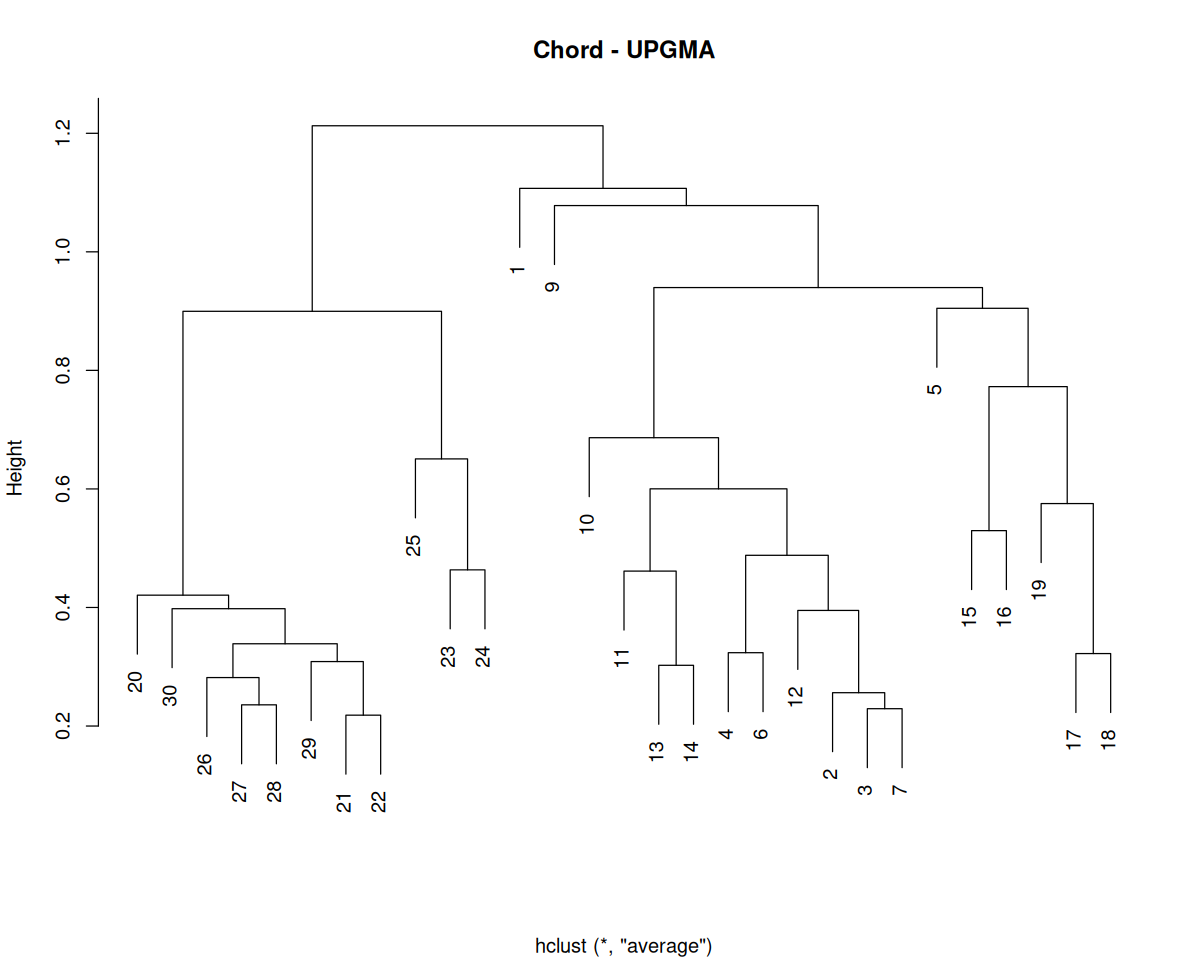

In [8]:
# Compute and plot UPGMA agglomerative clustering
spe.ch.UPGMA <- hclust(spe.ch, method = "average")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.UPGMA, main = "Chord - UPGMA", xlab="")

## 1.4 UPGMC clustering -> *hclust(`df_dist`,method ="`centroid`")*

<div style="padding: 10px; border:5px solid orange; font-size: 10px; text-align: center;">
    <div style="margin-top: 0px; margin-bottom: 40px; font-size: 22px; font-weight: bold;">
       <span style="color: orange;">Centroid Linkage</span>
    </div>
    <img src="images/Script3_UPGMC.png" width="57%">
    <img src="images/CentroidLinkage.png" width="35%">
    <div style="margin-top: 20px; font-size: 20px; font-weight: bold;">
       <span style="color: orange;">Distance</span> is defined as the <span style="color: orange;">Euclidian distance</span> between the 
       <span style="color: orange;">centroids</span> (means) of two clusters.  
       The position of the new centroid is updated at each merge.
    </div>
</div>


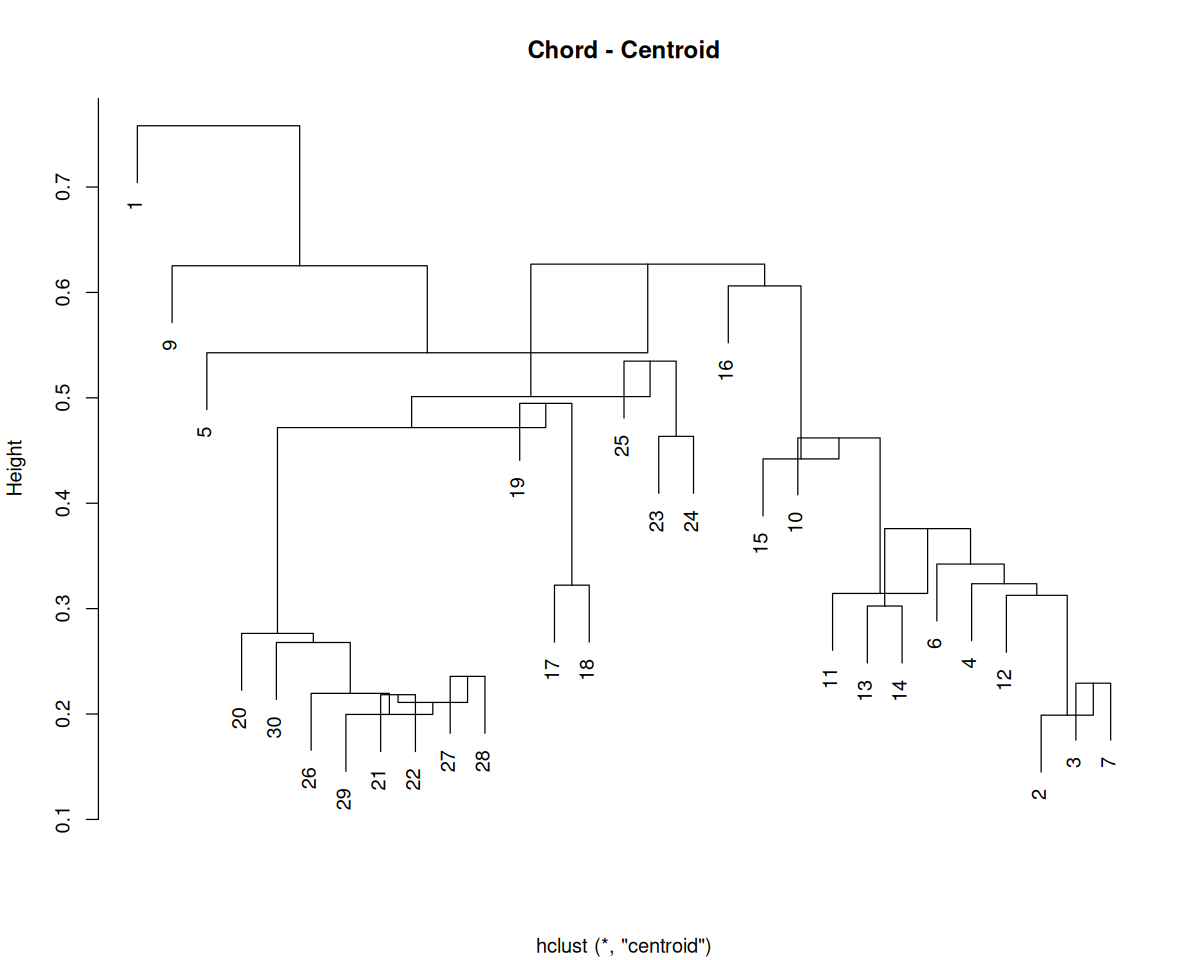

In [9]:
# Compute and plot UPGMC agglomerative clustering
spe.ch.centroid <- hclust(spe.ch, method = "centroid")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.centroid, main = "Chord - Centroid", xlab="")

## 1.5 Ward's minimum variance clustering -> ***hclust**(`df_dist`,method ="`ward.D2`")*

<div style="padding: 10px; border:5px solid #e377c2; font-size: 10px; text-align: center;">
    <div style="margin-top: 0px; margin-bottom: 40px; font-size: 22px; font-weight: bold;">
       <span style="color: #e377c2;">Ward Linkage</span>
    </div>
    <img src="images/wardLinkage.png" width="47%">
    <div style="margin-top: 20px; font-size: 20px; font-weight: bold;">
        Specifies the distance between two clusters, computes the <span style="color: #e377c2;">sum of squares error (ESS)</span>, and successively chooses the next clusters based on the smaller <span style="color: #e377c2;">ESS</span>.
    </div>
</div>


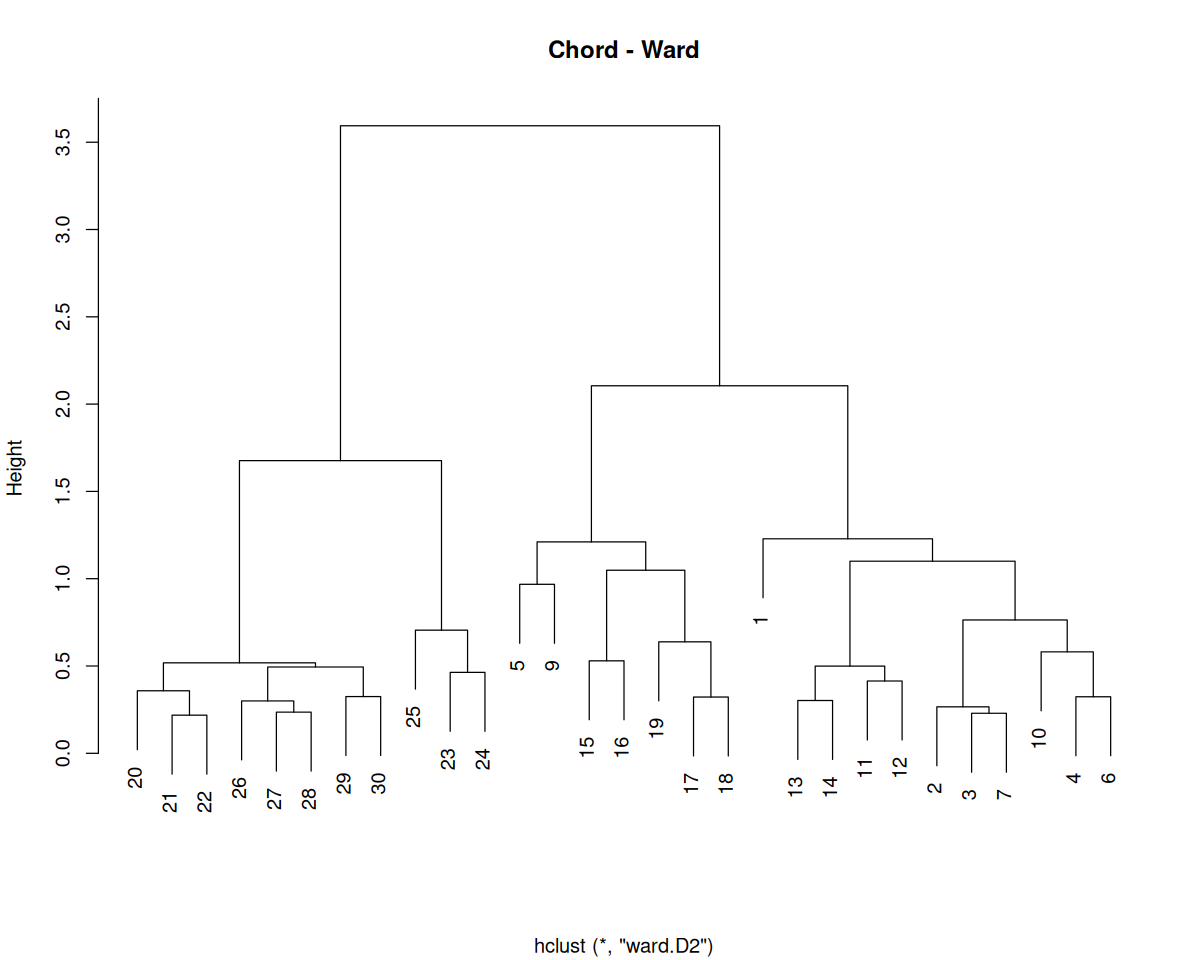

In [10]:
# Compute and plot Ward's minimum variance agglomerative clustering
spe.ch.ward <- hclust(spe.ch, method = "ward.D2")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.ward,  main = "Chord - Ward", xlab="")

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 1</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        Here is an example of UPGMC derived from a distance matrix between several samples. <br/><br/><br/><br/>
        <strong>Which statements are correct? </strong>
    </div>
    <div style="margin-left: 20px;">
      <img src="images/UPGMC_Exemple.png" alt="Skewed distribution" style="max-width: 500px; height: auto; border: 1px solid #ccc;" />
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) In the first iteration, the two centroids are point 1 and point 2</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) The first centroid is closer to point 4 than to point 3</label><br/>
  <label><input type="radio" name="q5" value="3"> 3) The distance between the first centroid (created from point 1 and point 2) and point 3 is approximately 6.3</label><br/>
  <label><input type="radio" name="q5" value="4"> 4) The distance between point 4 and the centroid formed by points 1, 2, and 3 is 9.4</label><br/>
  <label><input type="radio" name="q5" value="5"> 5) The distance between point 1 and point 2 to form the first centroid is approximately 6.3</label><br/>
  <label><input type="radio" name="q5" value="6"> 6) The distance between point 1 and point 4 is 9.4</label>
</form>

</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 1) In the first iteration, the two centroids are point 1 and point 2</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) The first centroid is closer to point 4 than to point 3</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 3) The distance between the first centroid (created from point 1 and point 2) and point 3 is approximately 6.3</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 4) The distance between point 4 and the centroid formed by points 1, 2, and 3 is 9.4</label><br/>
  <label><input type="radio" name="q5" value="5"> 5) The distance between point 1 and point 2 to form the first centroid is approximately 6.3</label><br/>
  <label><input type="radio" name="q5" value="6"> 6) The distance between point 1 and point 4 is 9.4</label>
</form>

  </div>
</details>


# 2 Non-hierarchical (Partition) clustering : **K-means**

<div style="padding: 20px; display: flex; border:4px solid green; justify-content: space-between;">
    <img src="images/Script3_kmeans_1.png" width="75%">
</div>


*Source : Divakar, K-Means Clustering, Medium, 2023. https://medium.com/@divakar1591/k-means-clustering-fe4684e89df9*

## 2.0 Compute and plot K-means clustering -> ***kmeans()***

### 2.0.1 k-means clustering computation -> ***kmeans**(`df_dist`,`centers` =,`iter.max`=)*

*Performs k-means partitioning clustering on a distance matrix.*
- **`df_dist`** : distance matrix
- **`centers`** : Number of clusters (k) to create
- **`iter.max`** : Maximum iterations

***outputs*** :

- **K-means clustering** : with ***m*** clusters of sizes ***n<sub>1</sub>***, ***n<sub>2</sub>***, ***n<sub>3</sub>***, ..., ***n<sub>m</sub>***
  
- **Cluster Means** : Each row = a cluster, Each column = a variable, The values = mean value of that variable in that cluster

- **Clustering vector** :  Tells which cluster each data point belongs to.

- **Within cluster sum of squares by cluster** : Measures how tight the points are within each cluster.

- ***Available components***:
  - - `cluster`: cluster membership vector  
  - - `centers`: cluster centers (means)  
  - - `totss`: total sum of squares  
  - - `withinss`: within-cluster sum of squares by cluster  
  - - `tot.withinss`: total within-cluster sum of squares  
  - - `betweenss`: between-cluster sum of squares  
  - - `size`: sizes of clusters  
  - - `iter`: number of iterations performed  
  - - `ifault`: error code (0 if no error)  



### 2.0.2 k-means Visualization -> ***plot**(`df`, `col` = `kmean_obj$cluster`,`pch`,`main`,`xlab`,`ylab`)*

Visualizes k-means clustering results in 2D/3D space with cluster boundaries.

- **`df`** : *dataframe matrix*
- **`kmean_obj`** : *k-mean object created with the distance matrix*
- **`pch`** : *Point style*
- **`Main`** : *Title*
- **`xlab`** : *x-axis label*
- **`ylab`** : *y-axis label*

## 2.1 K-means clustering

In [ ]:
#k-means clustering (non-hierarchical)
spe.ch.k<-  kmeans(spe.ch, centers=3)
spe.ch.k

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 2</span><br/><br/>

  1) Load the <code>Sample_Location.csv</code> file and store it in a variable named <code>Sample_Location</code>.<br/><br/>

  2) Each row in the dataset represents a sample, and the columns correspond to its <code>x</code> and <code>y</code> coordinates. Compute the pairwise Euclidean distances between all sample locations.<br/><br/>

  3) Perform k-means clustering on the ditsance matrix computed in 2. with 8 clusters<br/><br/>

  4) Based on the clustering result, report:<br/>
  - The total number of clusters<br/>
  - The size of each cluster<br/><br/>

  5) Create a scatter plot of the sample locations where each point is colored according to its assigned cluster.
</div>


In [ ]:
# 1) Read the CSV file into a dataframe named Sample_Location (hint: use read.csv())
Sample_Location <- _____("Sample_Location.csv")
Sample_Location


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> Sample_Location <- <span style="color:blue;">read.csv</span>("Sample_Location.csv") </code><br/>
  </div>
</details>


In [ ]:
# 2)  Compute the pairwise Euclidean distances between all sample locations.

# ( hint : use dist() )
Sample_Location.de <- _____(Sample_Location)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> Sample_Location.de <- <span style="color:blue;">dist</span>(Sample_Location) </code><br/>
  </div>
</details>


In [ ]:
# 3) Perform k-means clustering on the ditsance matrix 

# k-means clustering (non-hierarchical) with 8 centers (hint : use kmeans())
Sample_Location.de.k<-  _____(Sample_Location.de, centers=____)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> Sample_Location.de.k<- <span style="color:blue;">kmeans</span>(Sample_Location.de, centers= <span style="color:blue;">8 </span>)</code><br/>
  </div>
</details>


In [ ]:
# 4) Display details of the kmeans clustering
Sample_Location.de.k

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <img src="images/Script3_Q2.png" alt="kmeans code" style="max-width:100%;">
  </div>
</details>


In [ ]:
# 5) Create a scatter plot of the sample locations where each point is colored according to its assigned cluster.

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

plot(Sample_Location$X, Sample_Location$Y, col = ________$cluster, pch = 16, cex = 1.5) # hint use the kmean_obj created  

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">5) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> plot(Sample_Location$X, Sample_Location$Y, col =<span style="color:blue;"> Sample_Location.de.k$cluster</span>,pch = 16, cex = 1.5) </code><br/>
    <img src="images/Script3_Q2_plot.png" alt="kmeans code" style="max-width:100%;">
  </div>
</details>


# 3 Optimal number of clusters -> *NbClust()*

## 3.1 Optimal number of clusters → *NbClust(`df`, diss= `df_dist`,`distance` = NULL, `min.nc` =, `max.nc` =, `method`=,`index` =)*

- **`df`** : *Raw data matrix*    
- **`df_dist`** : *Distance matrix*,(only used if `diss = NULL`)  
- **`method`** : *Clustering method*:  
  - "complete": Complete linkage  
  - "single": Single linkage  
  - "average": UPGMA  
  - "ward.D2": Ward's minimum variance method  
- **`min.nc`, `max.nc`** : *Range of cluster numbers to test (min to max)*  
- **`index`** : *Evaluation index*, e.g., `"ch"` (Calinski-Harabasz), `"silhouette"`, `"gap"`, etc.


**Output**  :

- **`Nb.result$All.index`**  
  - A numeric vector containing the values of the evaluation index for **all** tested cluster numbers (from `min.nc` to `max.nc`)  
- **`Nb.result$Best.nc`**  
  - A list containing:  
    - `Number_clusters` → The optimal number of clusters determined by the chosen index  
    - `Value_Index` → The value of the evaluation index at the optimal number of clusters
- **`Nb.result$Best.partition`**  
  - A vector assigning each observation in the data to one of the clusters in the optimal partition  
  - Each element corresponds to the cluster label for that observation  


### 3.1.1 Find optimal number of clusters for the Single Linkage Clustering 

In [ ]:
# Load required packages
library(NbClust)

In [ ]:
Nb.single <- NbClust(
  spe,                # Input Spe matrix 
  diss = spe.ch,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "single",  # Clustering linkage method: single linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

In [ ]:
Nb.single  # Displays the output from NbClust, including the suggested optimal number of clusters and clustering indices for all tested cluster counts

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 3</span><br/><br/>

  1) Determine the <strong>optimal number of clusters</strong> (between <strong>2</strong> and <strong>24</strong>) using <strong>Ward's linkage hierarchical clustering</strong> on the <code>spe</code> dataset, based on the <code>spe.ch</code> chord distance matrix and the <strong>Calinski-Harabasz index</strong> as the evaluation criterion.<br/><br/>

  Display the output from the <code>NbClust()</code> function.<br/><br/>

  Based on the results, report the following:<br/>
  
  2) The <strong>optimal number of clusters</strong><br/>
  
  3) The <strong>Calinski-Harabasz index value</strong> at the optimal number of clusters<br/>
  
  4) The <strong>cluster assignment</strong> for <code>sample 21</code><br/>
</div>


In [ ]:
# Q1: Determine the optimal number of clusters (between 2 and 24)

# - Use the 'spe' dataset

# - Perform hierarchical clustering with Ward's linkage method

# - Use the 'spe.ch' chord distance matrix

# - Evaluate the clustering with the Calinski-Harabasz index

# - Search for the optimal number of clusters in the range 2 to 24


Nb.ward <- NbClust(
  ___,                 # Input data matrix
  diss = ____,         # Chord distance matrix for 'spe'
  distance = NULL,     # Distance metric is NULL because we provide 'diss' directly
  min.nc = ___,        # Minimum number of clusters to test
  max.nc = ___,        # Maximum number of clusters to test 
  method = "___",      # Clustering linkage method: Ward's  linkage here
  index = "___"        # Evaluation criterion: Calinski-Harabasz index ()
)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
      
<code> Nb.ward <- NbClust(
                      <span style="color:blue;">spe</span>,                 # Input data matrix
                      diss = <span style="color:blue;">spe.ch</span>,       # Chord distance matrix for 'spe'
                      distance = NULL,                                      # Distance metric is NULL 
                      min.nc = <span style="color:blue;">2</span>,          # Minimum number of clusters to test
                      max.nc = <span style="color:blue;">24</span>,         # Maximum number of clusters to test 
                      method = "<span style="color:blue;">ward.D2</span>",  # Clustering linkage method: Ward's  linkage here
                      index = "<span style="color:blue;">ch</span>"         # Evaluation criterion: Calinski-Harabasz index ()
      ) </code>




In [ ]:
# Q2 Based on the results, report the following:

# The optimal number of clusters
Nb.ward

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
      
<strong>$All.index</strong><br/>
<strong>2:</strong> 20.5008 &nbsp;
  <strong>3:</strong> 14.3605 &nbsp;
  <strong>4:</strong> 20.3359 &nbsp;
  <strong>5:</strong> 16.0146 &nbsp;
  <strong>6:</strong> 15.0341 &nbsp;
  <strong>7:</strong> 13.5033 &nbsp;
  <strong>8:</strong> 13.6405 &nbsp;
  <strong>9:</strong> 13.3736 &nbsp;
  <strong>10:</strong> 12.0871 &nbsp;
  <strong>11:</strong> 10.4986 &nbsp;
  <strong>12:</strong> 10.0238 &nbsp;
  <strong>13:</strong> 9.1067 &nbsp;
  <strong>14:</strong> 8.5711 &nbsp;
  <strong>15:</strong> 8.9764 &nbsp;
  <strong>16:</strong> 8.4798 &nbsp;
  <strong>17:</strong> 12.0083 &nbsp;
  <strong>18:</strong> 11.3656 &nbsp;
  <strong>19:</strong> 10.5599 &nbsp;
  <strong>20:</strong> 10.8874 &nbsp;
  <strong>21:</strong> 12.5799 &nbsp;
  <strong>22:</strong> 11.2628 &nbsp;
  <strong>23:</strong> 10.3651 &nbsp;
  <strong>24:</strong> 9.3219
  <br/><br/>

  <strong>$Best.nc</strong><br/>
  <span style="color: blue;" >Number_clusters 2</span><br/>
  Value_Index: 20.5008<br/><br/>

  <strong>$Best.partition</strong><br/>
<strong>1:</strong> 1 &nbsp;
<strong>2:</strong> 1 &nbsp;
<strong>3:</strong> 1 &nbsp;
<strong>4:</strong> 1 &nbsp;
<strong>5:</strong> 1 &nbsp;
<strong>6:</strong> 1 &nbsp;
<strong>7:</strong> 1 &nbsp;
<strong>9:</strong> 1 &nbsp;
<strong>10:</strong> 1 &nbsp;
<strong>11:</strong> 1 &nbsp;
<strong>12:</strong> 1 &nbsp;
<strong>13:</strong> 1 &nbsp;
<strong>14:</strong> 1 &nbsp;
<strong>15:</strong> 1 &nbsp;
<strong>16:</strong> 1 &nbsp;
<strong>17:</strong> 1 &nbsp;
<strong>18:</strong> 1 &nbsp;
<strong>19:</strong> 2 &nbsp;
<strong>20:</strong> 2 &nbsp;
<strong>21:</strong> 2 &nbsp;
<strong>22:</strong> 2 &nbsp;
<strong>23:</strong> 2 &nbsp;
<strong>24:</strong> 2 &nbsp;
<strong>25:</strong> 2 &nbsp;
<strong>26:</strong> 2 &nbsp;
<strong>27:</strong> 2 &nbsp;
<strong>28:</strong> 2 &nbsp;
<strong>29:</strong> 2 &nbsp;
<strong>30:</strong> 2 &nbsp;

</details>


In [ ]:
# Q3 Based on the results, report the following:

# The Calinski-Harabasz index value at the optimal number of clusters
Nb.ward

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
      
<strong>$All.index</strong><br/>
<strong>2:</strong> 20.5008 &nbsp;
  <strong>3:</strong> 14.3605 &nbsp;
  <strong>4:</strong> 20.3359 &nbsp;
  <strong>5:</strong> 16.0146 &nbsp;
  <strong>6:</strong> 15.0341 &nbsp;
  <strong>7:</strong> 13.5033 &nbsp;
  <strong>8:</strong> 13.6405 &nbsp;
  <strong>9:</strong> 13.3736 &nbsp;
  <strong>10:</strong> 12.0871 &nbsp;
  <strong>11:</strong> 10.4986 &nbsp;
  <strong>12:</strong> 10.0238 &nbsp;
  <strong>13:</strong> 9.1067 &nbsp;
  <strong>14:</strong> 8.5711 &nbsp;
  <strong>15:</strong> 8.9764 &nbsp;
  <strong>16:</strong> 8.4798 &nbsp;
  <strong>17:</strong> 12.0083 &nbsp;
  <strong>18:</strong> 11.3656 &nbsp;
  <strong>19:</strong> 10.5599 &nbsp;
  <strong>20:</strong> 10.8874 &nbsp;
  <strong>21:</strong> 12.5799 &nbsp;
  <strong>22:</strong> 11.2628 &nbsp;
  <strong>23:</strong> 10.3651 &nbsp;
  <strong>24:</strong> 9.3219
  <br/><br/>

  <strong>$Best.nc</strong><br/>
  Number_clusters 2<br/>
  <span style="color: blue;" >Value_Index: 20.5008</span><br/><br/>

  <strong>$Best.partition</strong><br/>
<strong>1:</strong> 1 &nbsp;
<strong>2:</strong> 1 &nbsp;
<strong>3:</strong> 1 &nbsp;
<strong>4:</strong> 1 &nbsp;
<strong>5:</strong> 1 &nbsp;
<strong>6:</strong> 1 &nbsp;
<strong>7:</strong> 1 &nbsp;
<strong>9:</strong> 1 &nbsp;
<strong>10:</strong> 1 &nbsp;
<strong>11:</strong> 1 &nbsp;
<strong>12:</strong> 1 &nbsp;
<strong>13:</strong> 1 &nbsp;
<strong>14:</strong> 1 &nbsp;
<strong>15:</strong> 1 &nbsp;
<strong>16:</strong> 1 &nbsp;
<strong>17:</strong> 1 &nbsp;
<strong>18:</strong> 1 &nbsp;
<strong>19:</strong> 2 &nbsp;
<strong>20:</strong> 2 &nbsp;
<strong>21:</strong> 2 &nbsp;
<strong>22:</strong> 2 &nbsp;
<strong>23:</strong> 2 &nbsp;
<strong>24:</strong> 2 &nbsp;
<strong>25:</strong> 2 &nbsp;
<strong>26:</strong> 2 &nbsp;
<strong>27:</strong> 2 &nbsp;
<strong>28:</strong> 2 &nbsp;
<strong>29:</strong> 2 &nbsp;
<strong>30:</strong> 2 &nbsp;

</details>


In [ ]:
# Q4 Based on the results, report the following:

# The cluster assignment for sample 21
Nb.ward


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
      
<strong>$All.index</strong><br/>
<strong>2:</strong> 20.5008 &nbsp;
  <strong>3:</strong> 14.3605 &nbsp;
  <strong>4:</strong> 20.3359 &nbsp;
  <strong>5:</strong> 16.0146 &nbsp;
  <strong>6:</strong> 15.0341 &nbsp;
  <strong>7:</strong> 13.5033 &nbsp;
  <strong>8:</strong> 13.6405 &nbsp;
  <strong>9:</strong> 13.3736 &nbsp;
  <strong>10:</strong> 12.0871 &nbsp;
  <strong>11:</strong> 10.4986 &nbsp;
  <strong>12:</strong> 10.0238 &nbsp;
  <strong>13:</strong> 9.1067 &nbsp;
  <strong>14:</strong> 8.5711 &nbsp;
  <strong>15:</strong> 8.9764 &nbsp;
  <strong>16:</strong> 8.4798 &nbsp;
  <strong>17:</strong> 12.0083 &nbsp;
  <strong>18:</strong> 11.3656 &nbsp;
  <strong>19:</strong> 10.5599 &nbsp;
  <strong>20:</strong> 10.8874 &nbsp;
  <strong>21:</strong> 12.5799 &nbsp;
  <strong>22:</strong> 11.2628 &nbsp;
  <strong>23:</strong> 10.3651 &nbsp;
  <strong>24:</strong> 9.3219
  <br/><br/>

  <strong>$Best.nc</strong><br/>
  Number_clusters 2<br/>
  Value_Index: 20.5008<br/><br/>

  <strong>$Best.partition</strong><br/>
<strong>1:</strong> 1 &nbsp;
<strong>2:</strong> 1 &nbsp;
<strong>3:</strong> 1 &nbsp;
<strong>4:</strong> 1 &nbsp;
<strong>5:</strong> 1 &nbsp;
<strong>6:</strong> 1 &nbsp;
<strong>7:</strong> 1 &nbsp;
<strong>9:</strong> 1 &nbsp;
<strong>10:</strong> 1 &nbsp;
<strong>11:</strong> 1 &nbsp;
<strong>12:</strong> 1 &nbsp;
<strong>13:</strong> 1 &nbsp;
<strong>14:</strong> 1 &nbsp;
<strong>15:</strong> 1 &nbsp;
<strong>16:</strong> 1 &nbsp;
<strong>17:</strong> 1 &nbsp;
<strong>18:</strong> 1 &nbsp;
<strong>19:</strong> 2 &nbsp;
<strong>20:</strong> 2 &nbsp;
<span style="color: blue;" ><strong>21: 2</strong></span> &nbsp;
<strong>22:</strong> 2 &nbsp;
<strong>23:</strong> 2 &nbsp;
<strong>24:</strong> 2 &nbsp;
<strong>25:</strong> 2 &nbsp;
<strong>26:</strong> 2 &nbsp;
<strong>27:</strong> 2 &nbsp;
<strong>28:</strong> 2 &nbsp;
<strong>29:</strong> 2 &nbsp;
<strong>30:</strong> 2 &nbsp;


</details>


## 3.2 Plot the optimal number of clusters -> *plot(`x`,`Nb.clust$\$$All.index`)*, *abline(v = `Nb.clust$\$$Best.nc[1]`)*

- **x** : *Range of cluster numbers to test (min to max)*  
- **Nb.clust$\$$All.index** : *Evaluation index values (y)*
- **Nb.clust$\$$Best.nc[1]** : *Optimal number of clusters*  

In [ ]:
# Set plot size in Jupyter Notebook (9 x 9 inches)
options(repr.plot.width = 9, repr.plot.height = 9)
# Plot Index values (y) vs. number of clusters (x from 2 to 16)

plot(2:16,                                    # x : Range of cluster numbers to test (min to max)
     Nb.single$All.index,                     # Index values (y) for each number of clusters
     xlab = "number of clusters",             # Label for x-axis
     ylab = "Calinski and Harabasz index")    # Label for y-axis

abline(v = Nb.single$Best.nc[1],              # Add a vertical dashed line at optimal number of clusters
       col = "red",                           # Color of the line
       lty = 2,                               # Line type 2 = dashed
       lwd = 2)                               # Line width thicker for visibility


# 4 Cophenetic correlation 

> The **cophenetic correlation** coefficient (or simply cophenetic correlation) is a measure used in  **assess** how well a **dendrogram** **preserves** the **original pairwise distances** between **data points**. It essentially **quantifies** the **similarity** between the **original distances** used to create the dendrogram and the "cophenetic **distances" derived from the dendrogram.**

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <img src="images/Cophenetic matrix.png" width="55%">
</div>


## 4.0 Cophenetic Distance and correlation Computation → *cophenetic(`hc`), cor(`df_dist`,`cophenetic_dist`)*

Used to evaluate how well the hierarchical clustering preserves the original pairwise distances.

- **hc** : *hierarchical clustering object from a distance matrix*
- **df_dist** : *distance matrix*
- **cophenetic_dist** : *cophenetic distance*

### 4.0.1 Compute the cophenetic distance matrix -> *cophenetic(`hc`)*

- **cophenetic_dist <- cophenetic(hc)** : *Compute the cophenetic distance matrix (ultrametric distances from the dendrogram)*

### 4.0.2 Compute the correlation between the cophenetic distance matrix and the distance matrix -> *cor(`df_dist`,`cophenetic_dist`)*

- **cor(copehenetic_dist,df_dist)** : *Compute the correlation between the original and cophenetic distances*

## 4.1 Single linkage clustering Cophenetic Correlation

In [ ]:
# Compute the cophenetic distance matrix from the dendrogram obtained with single linkage clustering
spe.ch.single.coph <- cophenetic(spe.ch.single)

# Compute the cophenetic correlation between the original dissimilarities and the dendrogram
cor(spe.ch, spe.ch.single.coph)

## 4.2 Complete linkage clustering Cophenetic Correlation

In [ ]:
# Compute the cophenetic distance matrix from the dendrogram obtained with complete linkage clustering
spe.ch.comp.coph <- cophenetic(spe.ch.complete)

# Compute the cophenetic correlation for complete linkage
cor(spe.ch, spe.ch.comp.coph)

## 4.3 UPGMA clustering Cophenetic Correlation

In [ ]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Average clustering
spe.ch.UPGMA.coph <- cophenetic(spe.ch.UPGMA)

# Compute the cophenetic correlation for Average clustering
cor(spe.ch, spe.ch.UPGMA.coph)

## 4.4 Ward's minimum variance clustering Cophenetic Correlation

In [ ]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Ward clustering
spe.ch.ward.coph <- cophenetic(spe.ch.ward)

# Compute the cophenetic correlation for Ward clustering
cor(spe.ch, spe.ch.ward.coph)

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 4</span><br/>


  <div style="margin-top: 10px; margin-bottom: 20px; line-height: 1.5;">
    After applying 5 different unsupervised clustering methods on a distance matrix, we obtain the following cophenetic correlations.<br/><br/>
    <img src="images/Script3_Q3.png" alt="Cophenetic Correlations" style="max-width: 40%; height: auto; margin-bottom: 15px;"> <br/>
    <strong>Which of the following statements are correct?</strong>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) The UPGMA clustering method best preserves the original distances from the distance matrix.</label><br/>
  <label><input type="radio" name="q5" value="1"> 2) The Complete Linkage clustering method best preserves the original distances from the distance matrix.</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) The Ward method is the least accurate.</label><br/>
  <label><input type="radio" name="q5" value="3"> 4) A cophenetic correlation of zero for the UPGMC method means there is no difference between the dendrogram distances and the original distance matrix.</label><br/>
  <label><input type="radio" name="q5" value="3"> 5) The dendrogram produced by the UPGMC method shows distances that are completely different from the original distance matrix values.</label><br/>
</form>


<details style="font-size: 18px; margin-top: 15px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline; cursor: pointer;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px; margin-top: 10px;">
<form>
  <label><input type="radio" name="q5" value="1"> 1) The UPGMA clustering method best preserves the original distances from the distance matrix.</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">  2) The Complete Linkage clustering method best preserves the original distances from the distance matrix.</label><br/>
  <label><input type="radio" name="q5" value="2"> 3) The Ward method is the least accurate.</label><br/>
  <label><input type="radio" name="q5" value="3"> 4) A cophenetic correlation of zero for the UPGMC method means there is no difference between the dendrogram distances and the original distance matrix.</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring">  5) The dendrogram produced by the UPGMC method shows distances that are completely different from the original distance matrix values.</label><br/>
</form>
  </div>
</details>


# Homework : Task 1

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">HOMEWORK : TASK 1</span><br/>
  Use the oribatide mite dataset, calculate a similarity measure and perform clustering analysis.<br/>
  <ol>
    <li> Use the oribatide mite dataset, import it in the environnement and calculate chord distance among samples </li>
    <li> Show dendogram using single linkage, complete linkage, UPGMA, UPGMC and Ward (no code writing needed)</li>
    <li> Based on visual inspection of the dendrogram - which clustering algorithm produces the "best" results?</li>
    <li> How many groups of sites - based on mite community similarity are there ? </li>
    <li> Log transform the data and then the calculate simlarity measure again </li>
    <li>  Show dendogram using single linkage, complete linkage, UPGMA, UPGMC and Ward and explore the impact of log-transformation of mite abundances on the cluster analysis (no code writing needed) </li>
      
  </ol>
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    Answer these questions based on your analysis.
  </p>
</div>


In [ ]:
## Q1 Use the oribatide mite dataset, import it in the environnement and calculate chord distance among samples

# Read the CSV file 
oribatide_mite <- _____("oribatide_mite.csv", row.names = 1)

# Normalize the data so that each sample vector length equals 1 (unit length),
# which is necessary for calculating chord distance (hint : use decostand() )
oribatide_mite.norm <- _____(oribatide_mite, method = "normalize")

# Compute the chord distance matrix between samples based on normalized data.
# Chord distance is the Euclidean distance between normalized vectors (unit length) (hint : use vegdist())
oribatide_mite.ch <- _____(oribatide_mite.norm, method = "euclidean")


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> oribatide_mite <- <span style="color:blue;">read.csv</span>("oribatide_mite.csv", row.names = 1)</code><br/>
    <code> oribatide_mite.norm <- <span style="color:blue;">decostand</span>(oribatide_mite, method = "normalize")</code><br/>
    <code> oribatide_mite.ch <- <span style="color:blue;">vegdist</span>(oribatide_mite.norm, method = "euclidean")</code><br/>
  </div>
</details>


In [ ]:
## Q2 Show dendogram using single linkage, complete linkage, UPGMA, UPGMC and Ward

## (You don't have to change anaything here)

# Set plot size in Jupyter Notebook (20 x 14 inches)
options(repr.plot.width = 20, repr.plot.height = 14)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))  # 3 rwos, 2 columns

# Compute single linkage agglomerative clustering
oribatide_mite.ch.single <- hclust(oribatide_mite.ch, method = "single")
plot(oribatide_mite.ch.single, main = "Chord - Single linkage", xlab="")

# Compute and plot complete-linkage agglomerative clustering
oribatide_mite.ch.complete <- hclust(oribatide_mite.ch, method = "complete")
plot(oribatide_mite.ch.complete, main = "Chord - Complete linkage", xlab="")

# Compute and plot UPGMA agglomerative clustering (average linkage)
oribatide_mite.ch.UPGMA <- hclust(oribatide_mite.ch, method = "average")
plot(oribatide_mite.ch.UPGMA, main = "Chord - UPGMA", xlab="")

# Compute and plot UPGMC agglomerative clustering (centroid linkage)
oribatide_mite.ch.centroid <- hclust(oribatide_mite.ch, method = "centroid")
plot(oribatide_mite.ch.centroid, main = "Chord - Centroid (UPGMC)", xlab="")

# Compute and plot Ward's minimum variance agglomerative clustering
oribatide_mite.ch.ward <- hclust(oribatide_mite.ch, method = "ward.D2")
plot(oribatide_mite.ch.ward, main = "Chord - Ward", xlab="")


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <img src="images/Script3_HW_Plots.png" alt="Dendrogram plots" style="max-width: 100%;">
  </div>
</details>


<p style="font-size: 25px;">
  3. Based on visual inspection of the dendrogram – which clustering algorithm produces the "best" results?
</p>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <img src="images/Script3_HomeWork.png" alt="Dendrogram plots" style="max-width: 100%; margin-bottom: 15px;"> <br>
    The <strong>Ward clustering</strong> algorithm visually provides the <strong>clearest</strong> and most interpretable <strong>structure</strong>: <br>
    The <strong>heights</strong> between clusters are relatively <strong>large</strong>, indicating <strong>well-defined group separation</strong>. <br>
    Unlike other methods, there is <strong>no entanglement or overlapping branches</strong>. <br>
    All clusters are clearly separated, balanced, and biologically coherent.
  </div>
</details>




<p style="font-size: 25px;">
  4. How many groups of sites - based on mite community similarity are there ?
</p>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    5
    <br><br>
    <img src="images/Script3_HomeWork_4.png" alt="Cluster groups from dendrogram" style="max-width: 100%;">
  </div>
</details>


In [ ]:
## Q5 Log transform the data and then the calculate simlarity measure again

# Apply log(x + 1) transformation to handle zeros and reduce skewness (hint : use log1p())
oribatide_mite.log <- ____(oribatide_mite)

# Normalize the log-transformed data (unit length per sample) (hint : use decostand())
oribatide_mite.log.norm <- ____(oribatide_mite.log, method = "normalize")

# Compute the chord distance matrix (Euclidean on normalized vectors) (hint : use vegdist)
oribatide_mite.log.ch <- ___(oribatide_mite.log.norm, method = "euclidean")


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">5) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> oribatide_mite.log <- <span style="color:blue;">log1p</span>(oribatide_mite)</code><br/>
    <code> oribatide_mite.log.norm <- <span style="color:blue;">decostand</span>(oribatide_mite.log, method = "normalize")</code><br/>
    <code>  oribatide_mite.log.ch <- <span style="color:blue;">vegdist</span>(oribatide_mite.log.norm, method = "euclidean")</code><br/>
  </div>
</details>


In [ ]:
## Q6 Show dendogram using single linkage, complete linkage, UPGMA, UPGMC and Ward and explore the impact of log-transformation of mite abundances on the cluster analysis

# Set plot size in Jupyter Notebook (20 x 14 inches)
options(repr.plot.width = 20, repr.plot.height = 14)
par(mfrow = c(3, 2), mar = c(4, 4, 2, 1))  # 3 rows, 2 columns

# --- Clustering on chord distances (log-transformed data) ---

# Single linkage
oribatide_mite.log.ch.single <- hclust(oribatide_mite.log.ch, method = "single")
plot(oribatide_mite.log.ch.single, main = "Log(Chord) - Single linkage", xlab="")

# Complete linkage
oribatide_mite.log.ch.complete <- hclust(oribatide_mite.log.ch, method = "complete")
plot(oribatide_mite.log.ch.complete, main = "Log(Chord) - Complete linkage", xlab="")

# UPGMA (average linkage)
oribatide_mite.log.ch.UPGMA <- hclust(oribatide_mite.log.ch, method = "average")
plot(oribatide_mite.log.ch.UPGMA, main = "Log(Chord) - UPGMA", xlab="")

# UPGMC (centroid linkage)
oribatide_mite.log.ch.centroid <- hclust(oribatide_mite.log.ch, method = "centroid")
plot(oribatide_mite.log.ch.centroid, main = "Log(Chord) - Centroid (UPGMC)", xlab="")

# Ward's method
oribatide_mite.log.ch.ward <- hclust(oribatide_mite.log.ch, method = "ward.D2")
plot(oribatide_mite.log.ch.ward, main = "Log(Chord) - Ward", xlab="")


# 5 Shepard Diagrams

> *A Shepard diagram **compares** **original** **dissimilarities** against **cophenetic distances from hierarchical clustering**. The **tighter the points align around the 1:1 reference line**, the **better the clustering preserves** the **original distance** structure. Deviations reveal distortions introduced by the clustering algorithm.*

<div style="padding: 10px; border:5px solid green; font-size: 10px; text-align: center;">
    <img src="images/shepard_distance.png" width="45%">
</div>


## 5.0 Shepard Diagram visualization 

→ *plot(`df_dist`,`cophenetic_dist`)*

→ *lines(lowess(`df_dist`, `cophenetic_dist`), col = "red", lwd = 3)*

The Shepard diagram visualizes the relationship between the original distance matrix and the cophenetic distances from a hierarchical clustering.

- **df_dist** : *distance matrix*
- **cophenetic_dist** : *copehenetic distance matrix*
- **abline(0,1)** : *Add a 1:1 reference line (ideal match between distances)*
- **lines(lowess(df_dist, cophenetic_dist), col = "red", lwd = 3)** : *Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend*


## 5.1 Shepard Diagaram for Single linkage clustering

In [ ]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(spe.ch, spe.ch.single.coph, #initial chord distance against cophenetic distance from single linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Single linkage", paste("Cophenetic correlation =", round(cor(spe.ch, spe.ch.single.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(spe.ch, spe.ch.single.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 5</span><br/><br/>

  1) Load the <code>orbatide_mite.csv</code> file and store it in a variable named <code>orbatide_mite</code>. and compute the Chord distances between all samples .<br/>


  2) Perform the 5 unsupervised clustering methods based on the distance matrix: Single Linkage, Complete Linkage, UPGMA, UPGMC, and Ward's method.

  3) Based on the clustering result, report:<br/>
  - The correlations between the cophenetic distance and the actual distance <br/>

  4) Based on the clustering result, report:<br/>
  - The Shepard diagrams<br/><br/>
</div>


In [ ]:
## Q1 Use the oribatide mite dataset, import it in the environnement and calculate chord distance among samples

# Read the CSV file 
oribatide_mite <- _____("oribatide_mite.csv", row.names = 1)

# Normalize the data so that each sample vector length equals 1 (unit length),
# which is necessary for calculating chord distance (hint : use decostand() )
oribatide_mite.norm <- _____(oribatide_mite, method = "normalize")

# Compute the chord distance matrix between samples based on normalized data.
# Chord distance is the Euclidean distance between normalized vectors (unit length) (hint : use vegdist())
oribatide_mite.ch <- _____(oribatide_mite.norm, method = "euclidean")


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> oribatide_mite <- <span style="color:blue;">read.csv</span>("oribatide_mite.csv", row.names = 1)</code><br/>
    <code> oribatide_mite.norm <- <span style="color:blue;">decostand</span>(oribatide_mite, method = "normalize")</code><br/>
    <code> oribatide_mite.ch <- <span style="color:blue;">vegdist</span>(oribatide_mite.norm, method = "euclidean")</code><br/>
  </div>
</details>


In [ ]:
## Q2 Perform the 5 unsupervised clustering methods based on the distance matrix: Single Linkage, Complete Linkage, UPGMA, UPGMC, and Ward's method.

# Compute single linkage agglomerative clustering 
oribatide_mite.ch.single <- hclust(oribatide_mite.ch, method = "____") # fill the blank

# Compute and plot complete-linkage agglomerative clustering
oribatide_mite.ch.complete <- hclust(oribatide_mite.ch, method = "____") # fill the blank

# Compute and plot UPGMA agglomerative clustering (average linkage)
oribatide_mite.ch.UPGMA <- hclust(oribatide_mite.ch, method = "____") # fill the blank

# Compute and plot UPGMC agglomerative clustering (centroid linkage)
oribatide_mite.ch.centroid <- hclust(oribatide_mite.ch, method = "____") # fill the blank

# Compute and plot Ward's minimum variance agglomerative clustering (hint Ward's minimum variance is called with "ward.D2" )
oribatide_mite.ch.ward <- hclust(oribatide_mite.ch, method = "____") # fill the blank


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> oribatide_mite.ch.single <- hclust(oribatide_mite.ch, method = <span style="color:blue;">"Single"</span>)</code><br/>
    <code> oribatide_mite.ch.complete <- hclust(oribatide_mite.ch, method = <span style="color:blue;">"Complete"</span>)</code><br/>
    <code> oribatide_mite.ch.UPGMA <- hclust(oribatide_mite.ch, method = <span style="color:blue;">"Average"</span>)</code><br/>
    <code> oribatide_mite.ch.centroid <- hclust(oribatide_mite.ch, method = <span style="color:blue;">"Centroid"</span>)</code><br/>
    <code> oribatide_mite.ch.ward <- hclust(oribatide_mite.ch, method = <span style="color:blue;">"ward.D2"</span>)</code><br/>
  </div>
</details>


In [ ]:
## Q3 Based on the clustering result, report:

# -> The correlation between the cophenetic distance and the actual distance

# Create a list containing different clustering objects
clustering_list <- list(
  oribatide_mite.ch.single,
  oribatide_mite.ch.complete,
  oribatide_mite.ch.UPGMA,
  oribatide_mite.ch.centroid,
  oribatide_mite.ch.ward
)

# Create a list containing different clustering mehtod's name
clustering_name <- list(
  "single",
  "complete",
  "Average",
  "Centroid",
  "Ward"
)


# Loop over indices from 1 to the length of clustering_list
for (i in 1:length(clustering_list)) {

   # Get the clustering object at position i in the list 
  clustering_obj <- clustering_list[[i]]

   # Compute the cophenetic distance matrix for this clustering object 
  cophenetic_dist <- ___(clustering_obj) # (hint : use cophenetic() )

  # Calculate the correlation between the cophenetic distances and the reference distance matrix  
  cophenetic_cor <- ___(cophenetic_dist, oribatide_mite.ch) # (hint : use cor() )

   # Print the clustering method name and its corresponding correlation value 
  cat(clustering_name[[i]], ": ", cophenetic_cor, "\n")
}

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> cophenetic_dist <-<span style="color:blue;">cophenetic</span>(clustering_obj)</code><br/>
    <code> cophenetic_cor <-<span style="color:blue;">cor</span>(cophenetic_dist, oribatide_mite.ch)</code><br/>
  </div>
        <pre style="font-family: monospace;">
single   : <span style="color: blue;">0.980991</span>
complete : <span style="color: blue;">0.9690431</span>
Average  : <span style="color: blue;">0.9828183</span>
Centroid : <span style="color: blue;">0.9754404</span>
Ward     : <span style="color: blue;">0.9473048</span>
</pre>
</details>





In [ ]:
## Q4 Based on the clustering result, report:

# -> The The Shepard diagrams

# Set plot size in Jupyter Notebook (17 x 10 inches)
options(repr.plot.width = 17, repr.plot.height = 10)

# Prepare the graphics window with 3 rows and 2 columns
par(mfrow = c(3, 2), mar = c(4, 5, 3, 1))

# keep reference chord initial  distance
dist_ref <- oribatide_mite.ch

# Loop over indices from 1 to the length of clustering_list
for (i in 1:length(clustering_list)) {
    
   # Get the clustering object at position i in the list 
  clustering_obj <- clustering_list[[i]]

   # Compute the cophenetic distance matrix for this clustering object 
  cophenetic_dist <- ___(clustering_obj) # (hint : use cophenetic() )

  # Calculate the correlation between the cophenetic distances and the reference distance matrix  
  cophenetic_cor <- ___(cophenetic_dist, oribatide_mite.ch) # (hint : use cor() )
    
  
  # Round the cophenetic correlation with maximum of 3 digits after comma
  cophenetic_cor <- round(cophenetic_cor, 3)

  # Retrieve the method name
    method <- clustering_name[[i]]

  # Plot Shepard diagram with larger text
  plot(dist_ref, cophenetic_dist,
       xlab = "Chord distance",
       ylab = "Cophenetic distance",
       asp = 1, xlim = c(0, sqrt(2)),
       ylim = c(0, sqrt(2)),
       main = paste(method, "\nCophenetic correlation =", cophenetic_cor),
       cex.main = 1.6,   # title size
       cex.lab = 1.4,    # label size
       cex.axis = 1.2    # axis ticks size
  )
  abline(0, 1)  # 1:1 reference line
  lines(lowess(dist_ref, cophenetic_dist), col = "red", lwd = 3)
    
}


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> cophenetic_dist <-<span style="color:blue;">cophenetic</span>(clustering_obj)</code><br/>
    <code> cophenetic_cor <-<span style="color:blue;">cor</span>(cophenetic_dist, oribatide_mite.ch)</code><br/>
    <br/>
    <img src="images/Script3_Q4.png" alt="Script3 Q4" style="margin-top: 15px; max-width: 100%; border: 1px solid #ccc;"/>
  </div>
</details>


# 6 Advanced dendogram plotting 

## 6.1 Advanced dendogram plotting -> *as.dendogram(`hc`)*, *plot (`hc.dend`)*

- **hc** : *hierarchical clustering object from a distance matrix*
- **hc.dend** :  *Dendogram objected from the hierarchical clustering object*
- **plot(hc.dend)** : *Plot the dendrogram*

### 6.1.1 UPGMA clustering dendogram plotting

In [ ]:
# Set plot size in Jupyter Notebook (9 x 9 inches)
options(repr.plot.width = 9, repr.plot.height = 9)

#convert from hclust object to dendrogram
UPGMA.dend <- as.dendrogram(spe.ch.UPGMA) 
#plot dendrogram
plot(UPGMA.dend)                            

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 6</span><br/><br/>

<ol>
  <li>Use the chord distance matrix <code>spe.ch</code> to perform hierarchical clustering with the complete linkage method, and store the result in <code>spe.ch.complete</code>.</li>
  <li>Convert the resulting <code>hclust</code> object into a <code>dendrogram</code> object and plot the resulting dendrogram.</li>
</ol>

</div>


In [ ]:
# Q1 Use the chord distance matrix spe.ch to perform hierarchical clustering with the complete linkage method, and store the result in spe.ch.complete

# Compute complete-linkage agglomerative clustering
spe.ch.complete <- ____(spe.ch, method = "____") # (hint : use hclust() )


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> spe.ch.complete <- <span style="color:blue;">hclust</span>(spe.ch, method = "<span style="color:blue;">complete</span>") </code><br/>
  </div>
</details>


In [ ]:
#convert from hclust object to dendrogram
spe.ch.complete.dend <- _____(spe.ch.complete) # (hint : use as.dendogram() )

# Set plot size in Jupyter Notebook (9 x 9 inches)
options(repr.plot.width = 9, repr.plot.height = 9)

#plot the dendrogram
plot(spe.ch.complete.dend,main = "Dendrogram - Complete Linkage Clustering")                            

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code>spe.ch.complete.dend &lt;- <span style="color:blue;">as.dendrogram</span>(spe.ch.complete)</code><br/><br/>
    <img src="images/Script3_Q6.png" alt="Dendrogram Image" style="margin-top:10px; max-width:100%; border:1px solid #ccc;">
  </div>
</details>


## 6.2 Advanced dendogram plotting -> Adding colours (with k-means) (needs dendextend library)

**Use the following structure**

```r

# Convert hierarchical clustering result into a dendrogram object
hc.dend <- as.dendrogram(hc)

# Run NbClust to determine the optimal number of clusters
Nb.hc <- NbClust(df, diss = df_dist, min.nc = <min_k>, max.nc = <max_k>, method = "<method>", index = "<index>")

# Extract the best partition (cluster assignments) from NbClust result
colors_to_use <- Nb.hc$Best.partition      

# Reorder the cluster assignments to match the order of the dendrogram leaves
colors_to_use <- colors_to_use[order.dendrogram(hc.dend)]

# Set the tip (leaf) label colors according to the cluster assignments
labels_colors(hc.dend) <- colors_to_use   


# Color the branches of the dendrogram according to the number of clusters found
labels_colors(hc.dend)<-1

k_optimal <- length(unique(colors_to_use))

hc.dend <- hc.dend %>% color_branches(k = k_optimal)

# Plot the colored dendrogram
plot(hc.dend)

```


### 6.2.1 Advanced plotting with UPMGA 

In [ ]:
library(dendextend)

In [ ]:
# Convert the hierarchical clustering result into a dendrogram object
UPGMA.dend <- as.dendrogram(spe.ch.UPGMA)

# Run NbClust to determine the optimal number of clusters
Nb.UPGMA <- NbClust(spe, diss = spe.ch, distance = NULL, min.nc = 2, max.nc = 16, 
                    method = "average", index = "ch")

# Extract the best partition (cluster assignments)
colors_to_use <- Nb.UPGMA$Best.partition

# Reorder the cluster assignments to match the order of dendrogram leaves
colors_to_use <- colors_to_use[order.dendrogram(UPGMA.dend)]

# Set the tip label colors according to the best partition
labels_colors(UPGMA.dend) <- colors_to_use

labels_colors(UPGMA.dend)<-1


# Color the branches of the dendrogram according to the number of clusters found
k_optimal <- length(unique(colors_to_use))
UPGMA.dend <- UPGMA.dend %>% color_branches(k = k_optimal)

# Plot the final colored dendrogram
plot(UPGMA.dend)
